In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

# Extracción de Características en Manifold No Lineales

PCA es muy útil cuando los datos yacen en un subespacio lineal, pero ¿qué ocurre si los datos forman una forma más compleja?

Si un subespacio lineal es una hoja de papel plana, entonces una hoja de papel enrollada es un ejemplo sencillo de una **variedad no lineal**.

Una vez enrollado, un plano 2D ocupa el espacio 3D. Sin embargo, en esencia sigue siendo un objeto 2D. En otras palabras, tiene baja dimensionalidad intrínseca.

Si de algún modo pudiéramos desenrollar el *Swiss roll*, recuperaríamos el plano 2D. Este es el objetivo de la reducción no lineal de la dimensionalidad, que asume que la variedad es más simple que la dimensión completa que ocupa e intenta desplegarla.


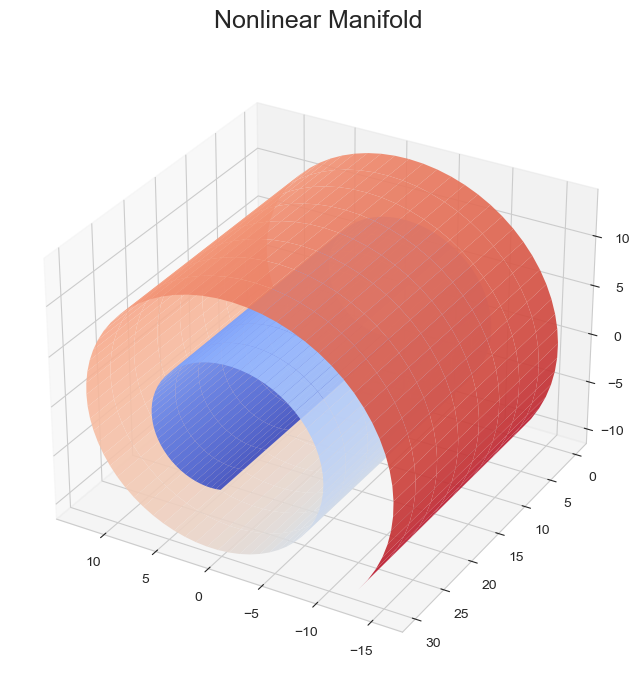

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Data generation
tt0 = 3 * np.pi / 2 * (1 + 2 * np.arange(0, 1.25, 0.01))
hh = np.arange(0, 1.125, 0.125) * 30
xx = np.transpose(np.tile(np.multiply(tt0, np.cos(tt0)), (len(hh), 1)))
yy = np.tile(hh, (len(tt0), 1))
zz = np.transpose(np.tile(np.multiply(tt0, np.sin(tt0)), (len(hh), 1)))
cc = np.transpose(np.tile((tt0-tt0.min())/(tt0.max()-tt0.min()), (len(hh), 1)))

# Create the figure and axis
fig = plt.figure(figsize=(10, 8))  # Larger figure size for better visibility
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surface = ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, 
                          linewidth=0, antialiased=True, 
                          facecolors=cm.coolwarm(cc), alpha=0.9, shade=False)

# Color bar
mappable = cm.ScalarMappable(cmap=cm.coolwarm)
mappable.set_array(cc)

# Viewing angle 
ax.view_init(elev=30, azim=120)

# Title
ax.set_title('Nonlinear Manifold', fontsize=18, pad=20)

plt.show()


La **observación clave** es que, incluso cuando una variedad grande parece complicada, el vecindario local alrededor de cada punto a menudo puede aproximarse bien con un parche de superficie plana.

Los **algoritmos de agrupamiento** no suelen presentarse como técnicas para el aprendizaje de estructura local, pero en realidad permiten precisamente eso. Los puntos que están próximos entre sí (donde la “proximidad” puede definirse mediante una métrica elegida) pertenecen al mismo **clúster**.

Dado un **agrupamiento**, un punto de datos puede representarse por su **vector de pertenencia** al clúster. Si el **número de clústeres** es menor que el número original de **características**, entonces la nueva representación tendrá **menos dimensiones** que la original. *Los datos originales se comprimen a una dimensionalidad menor*.


## Agrupamiento K-means

K-means es un **algoritmo de agrupamiento**. Los algoritmos de agrupamiento agrupan los datos según cómo se distribuyen en el espacio. Son **no supervisados**, ya que no requieren ninguna etiqueta: es tarea del algoritmo **inferir las etiquetas de los clústeres** basándose únicamente en la geometría de los propios datos.

Un algoritmo de agrupamiento depende de una **métrica**, una medida de proximidad entre puntos de datos. La métrica más popular es la **distancia euclidiana**:

$$
\lVert x - y \rVert_2
$$

K-means establece un **agrupamiento duro**, lo que significa que cada punto de datos se asigna a **un único** clúster. El algoritmo aprende a posicionar los **centroides** de modo que se **minimice** la suma total de la distancia euclidiana entre cada punto de datos y su centroide:

$$
\mathrm{min}_{C_1,\dots,C_k,\mu_1,\dots,\mu_k} \sum_{i=1}^{k} \sum_{x \in C_i} \lVert x - \mu_i \rVert_2
$$

Cada clúster $C_i$ contiene un subconjunto de puntos de datos. El **centro** del clúster $i$ es igual al **promedio** de todos los puntos de datos del clúster:

$$
\mu_i = \sum_{x \in C_i} \frac{x}{n_i}
$$


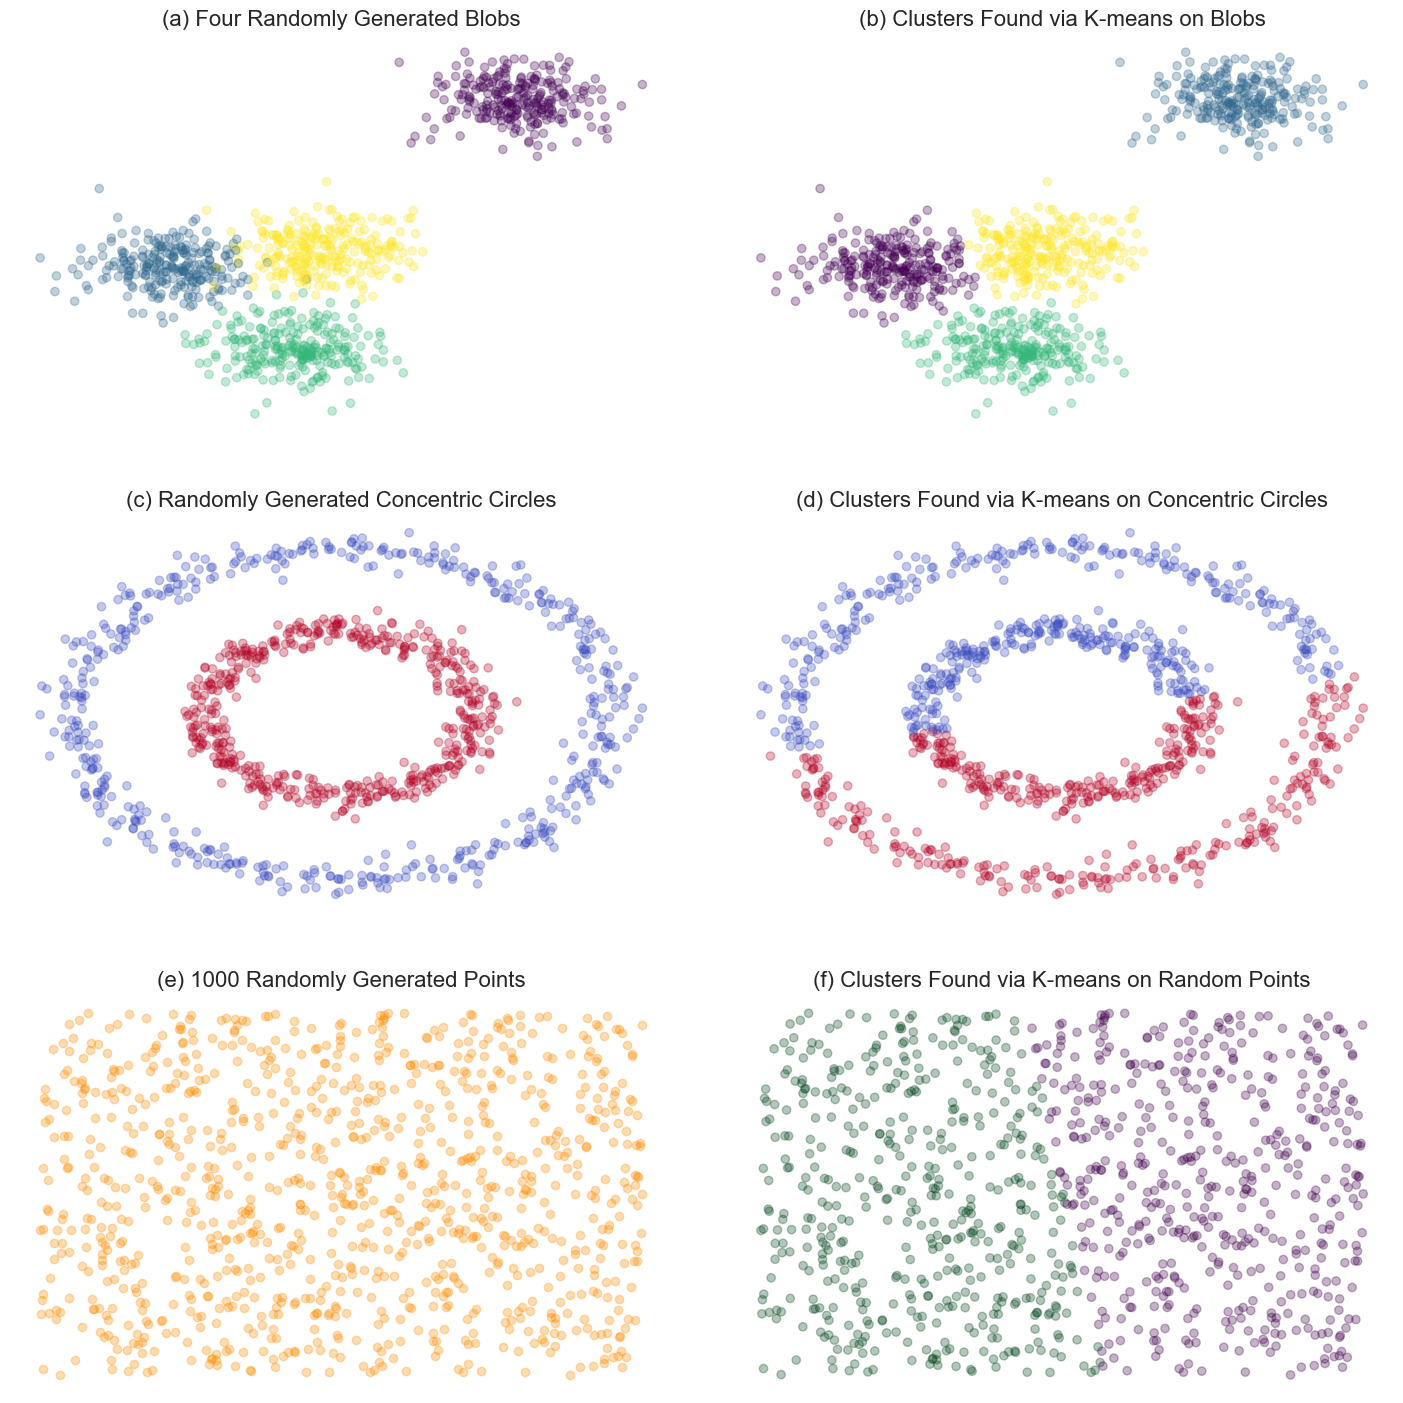

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles

# Parameters
n_data = 1000
n_centers = 4
noise_level = 0.05
seed = 1

# Generate random Gaussian blobs and run K-means
blobs, blob_labels = make_blobs(n_samples=n_data, n_features=2, centers=n_centers, random_state=seed)
clusters_blob = KMeans(n_clusters=n_centers, random_state=seed).fit_predict(blobs)

# Generate random concentric circles and run K-means
circles, circle_labels = make_circles(n_samples=n_data, factor=0.5, noise=noise_level, random_state=seed)
clusters_circles = KMeans(n_clusters=2, random_state=seed).fit_predict(circles)

# Generate random data uniformly at random and run K-means
uniform = np.random.rand(n_data, 2)
clusters_uniform = KMeans(n_clusters=2, random_state=seed).fit_predict(uniform)

# Create figure with subplots
figure = plt.figure(figsize=(15, 15))

alpha = 0.3

# (a) Four randomly generated blobs
plt.subplot(321)
plt.scatter(blobs[:, 0], blobs[:, 1], c=blob_labels, cmap='viridis', alpha=alpha)
plt.title("(a) Four Randomly Generated Blobs", fontsize=16)
plt.grid(True)
plt.axis('off')

# (b) Clusters found via K-means on blobs
plt.subplot(322)
plt.scatter(blobs[:, 0], blobs[:, 1], c=clusters_blob, cmap='viridis', alpha=alpha)
plt.title("(b) Clusters Found via K-means on Blobs", fontsize=16)
plt.grid(True)
plt.axis('off')

# (c) Randomly generated concentric circles
plt.subplot(323)
plt.scatter(circles[:, 0], circles[:, 1], c=circle_labels, cmap='coolwarm', alpha=alpha)
plt.title("(c) Randomly Generated Concentric Circles", fontsize=16)
plt.grid(True)
plt.axis('off')

# (d) Clusters found via K-means on concentric circles
plt.subplot(324)
plt.scatter(circles[:, 0], circles[:, 1], c=clusters_circles, cmap='coolwarm', alpha=alpha)
plt.title("(d) Clusters Found via K-means on Concentric Circles", fontsize=16)
plt.grid(True)
plt.axis('off')

# (e) 1000 randomly generated points
plt.subplot(325)
plt.scatter(uniform[:, 0], uniform[:, 1], color='darkorange', alpha=alpha)
plt.title("(e) 1000 Randomly Generated Points", fontsize=16)
plt.grid(True)
plt.axis('off')

# (f) Clusters found via K-means on random points
plt.subplot(326)
plt.scatter(uniform[:, 0], uniform[:, 1], c=clusters_uniform, cmap='PRGn', alpha=alpha)
plt.title("(f) Clusters Found via K-means on Random Points", fontsize=16)
plt.grid(True)
plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout(pad=3.0)

# Show plot
plt.show()


Las aplicaciones comunes de **agrupamiento** suelen suponer que existen *clústeres naturales*; es decir, regiones de *alta densidad de datos* dispersas en un espacio por lo demás vacío. En estas situaciones, existe la noción de un *número correcto de clústeres*, y se han ideado *índices de agrupamiento* que miden la calidad de las agrupaciones para elegir $k$. Sin embargo, cuando los datos están distribuidos de forma bastante **uniforme** (como en la figura anterior), *deja de existir* un número correcto de clústeres.

En este caso, el papel de un algoritmo de agrupamiento es la **cuantización vectorial**, es decir, particionar los datos en un número finito de porciones. El número de clústeres puede seleccionarse en función del **error de aproximación aceptable** al usar vectores cuantizados en lugar de los originales.

La *distribución uniforme* es el peor caso para K-means. Si la densidad de los datos no es uniforme, entonces podremos **representar más datos con menos clústeres**. En general, es difícil saber cómo están distribuidos los datos en espacios de *alta dimensionalidad*. Se puede ser conservador y elegir un $k$ mayor, pero no puede ser demasiado grande, porque $k$ se convertirá en el número de características para el siguiente paso de modelado.

Visualmente, este uso de K-means puede pensarse como **cubrir la superficie de los datos con parches**, que es lo que obtenemos si ejecutamos K-means sobre un conjunto de datos *Swiss roll.


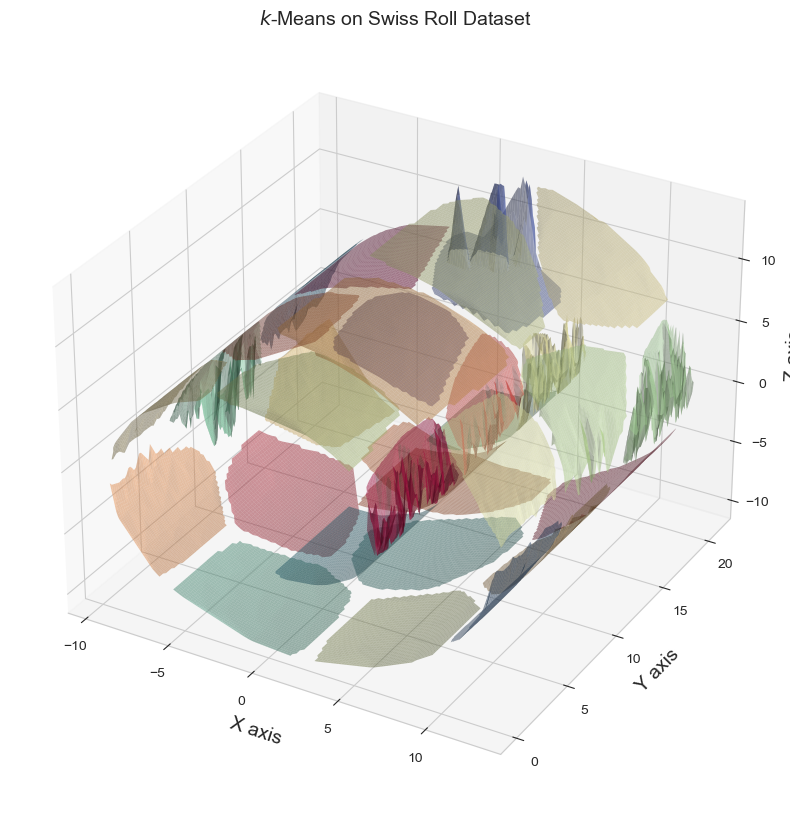

In [5]:
from sklearn import datasets
from scipy.interpolate import griddata

# Generate Swiss Roll dataset
X, _ = datasets.make_swiss_roll(n_samples=3000)

# Fit KMeans clustering
n_clusters = 30
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters_swiss_roll = kmeans.fit_predict(X)

# Create a figure for 3D plotting
fig2 = plt.figure(figsize=(12, 10))
ax = fig2.add_subplot(111, projection='3d')

# Create a color map for the clusters
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))

# Plot each cluster with a surface
for i in range(n_clusters):
    # Get the points for the current cluster
    cluster_points = X[clusters_swiss_roll == i]
    
    # Create a meshgrid for the surface
    grid_x, grid_y = np.mgrid[cluster_points[:, 0].min():cluster_points[:, 0].max():50j,
                               cluster_points[:, 1].min():cluster_points[:, 1].max():50j]
    
    # Interpolate the Z values for the grid using the current cluster points
    grid_z = griddata(cluster_points[:, :2], cluster_points[:, 2], (grid_x, grid_y), method='linear')

    # Plot the surface for the current cluster
    ax.plot_surface(grid_x, grid_y, grid_z, color=colors[i], alpha=0.5, edgecolor='none')


ax.set_title('$k$-Means on Swiss Roll Dataset')

plt.show()


### El algoritmo K-means

K-means es uno de los algoritmos de **agrupamiento** más rápidos y también de los más simples:

* Primero, inicializa aleatoriamente $k$ **centroides**: p. ej., se eligen aleatoriamente $k$ instancias distintas del **conjunto de datos** y se colocan los centroides en sus posiciones.
* Repite **hasta la convergencia** (es decir, hasta que los centroides dejan de moverse):

  * Asigna cada **instancia** al **centroide** más cercano.
  * **Actualiza** los centroides como la **media** de las instancias que se les han asignado.

La clase `KMeans` utiliza **por defecto** una técnica de **inicialización optimizada**. Para obtener el algoritmo K-means **original** (solo con fines educativos), debes configurar `init="random"` y `n_init=1`.

Vamos a **ejecutar** el algoritmo K-means durante **1, 2 y 3 iteraciones** para ver cómo se mueven los centroides.


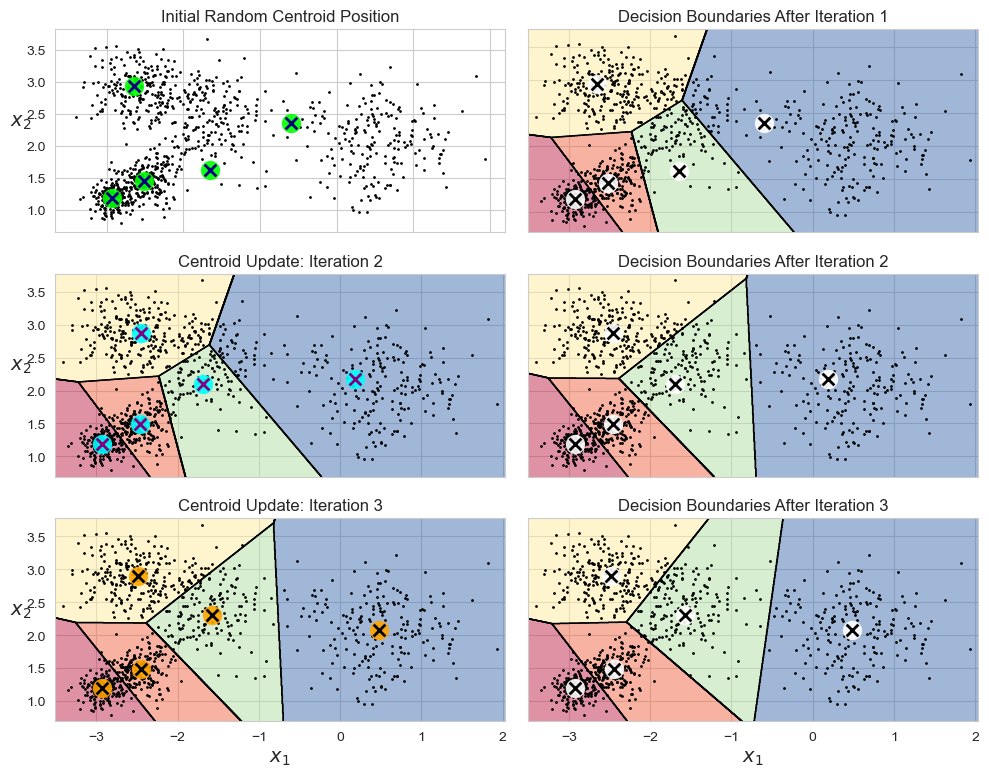

In [26]:
# Helper functions
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Spectral", alpha=0.5)
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Data
blob_centers = np.array([[ 0.5,  2.1], [-1.7,  2.5], [-2.5,  1.5],
                         [-2.6,  2.9], [-2.9,  1.2]])
blob_std = np.array([0.5, 0.4, 0.2, 0.3, 0.15])
X, y = make_blobs(n_samples=1000, centers=blob_centers, cluster_std=blob_std, random_state=7)

# KMeans iterations
rs = 1
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1, random_state=rs)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2, random_state=rs)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3, random_state=rs)

# Fit the data for different iterations
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

# Plotting 
plt.figure(figsize=(10, 8))

# Initial centroid positions
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='lime', cross_color='navy')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Initial Random Centroid Position", fontsize=12)

# Decision boundary after iteration 1
plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Decision Boundaries After Iteration 1", fontsize=12)

# Iteration 2: updated centroids
plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_, circle_color='cyan', cross_color='purple')
plt.title("Centroid Update: Iteration 2", fontsize=12)

# Decision boundary after iteration 2
plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)
plt.title("Decision Boundaries After Iteration 2", fontsize=12)

# Iteration 3: final centroids
plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_, circle_color='orange', cross_color='black')
plt.title("Centroid Update: Iteration 3", fontsize=12)

# Decision boundary after iteration 3
plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)
plt.title("Decision Boundaries After Iteration 3", fontsize=12)

plt.tight_layout()
plt.show()


### Encontrar el número óptimo de clústeres

Un enfoque bastante preciso (aunque más costoso computacionalmente) es usar la **puntuación de silueta**, que es la media del coeficiente de silueta sobre todas las instancias.

El **coeficiente de silueta** de una instancia es $(b - a)/\max(a, b)$, donde:

* $a$ es la distancia media a las demás instancias de su mismo clúster (distancia intra-clúster media),
* $b$ es la distancia media al clúster más cercano, es decir, a las instancias del siguiente clúster más próximo (el que minimiza $b$, excluyendo el clúster propio).

El coeficiente de silueta varía entre −1 y +1: cercano a +1 indica que la instancia está bien dentro de su clúster y lejos de los demás; cercano a 0 indica proximidad a una frontera; cercano a −1 sugiere asignación errónea.

Vamos a representar la puntuación de silueta en función de $k$.


In [7]:

# the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [8]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6267891051050734

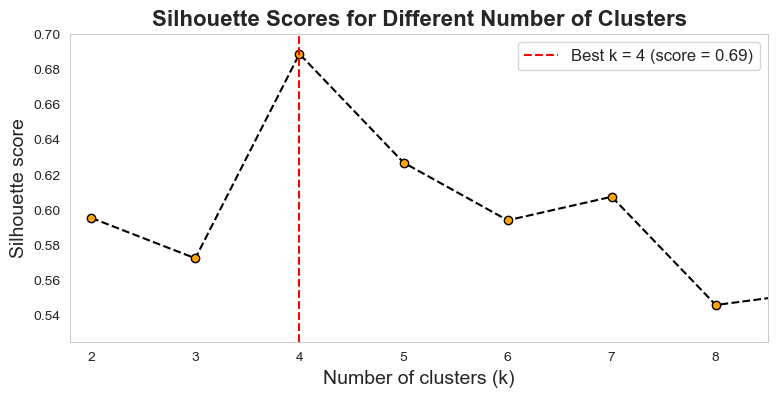

In [9]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(9, 4))
plt.plot(range(2, 10), silhouette_scores, "ko--", markerfacecolor='orange')
plt.xlabel("Number of clusters (k)", fontsize=14)
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.525, 0.7])
plt.grid()

# Highlight the best silhouette score
best_k = np.argmax(silhouette_scores) + 2  
best_score = silhouette_scores[best_k - 2]
plt.axvline(x=best_k, linestyle='--', color='red', label=f"Best k = {best_k} (score = {best_score:.2f})")
plt.legend(loc='best', fontsize=12)

plt.title("Silhouette Scores for Different Number of Clusters", fontsize=16, fontweight='bold')

plt.show()

Como podemos ver, esta visualización muestra que $k=4$ es una muy buena elección, pero también resalta que $k=5$ resulta bastante aceptable.

Una visualización aún más informativa se obtiene al graficar el coeficiente de silueta de cada instancia, ordenado por el clúster al que pertenece y por el valor del coeficiente. A esto se le llama un **diagrama de silueta**:


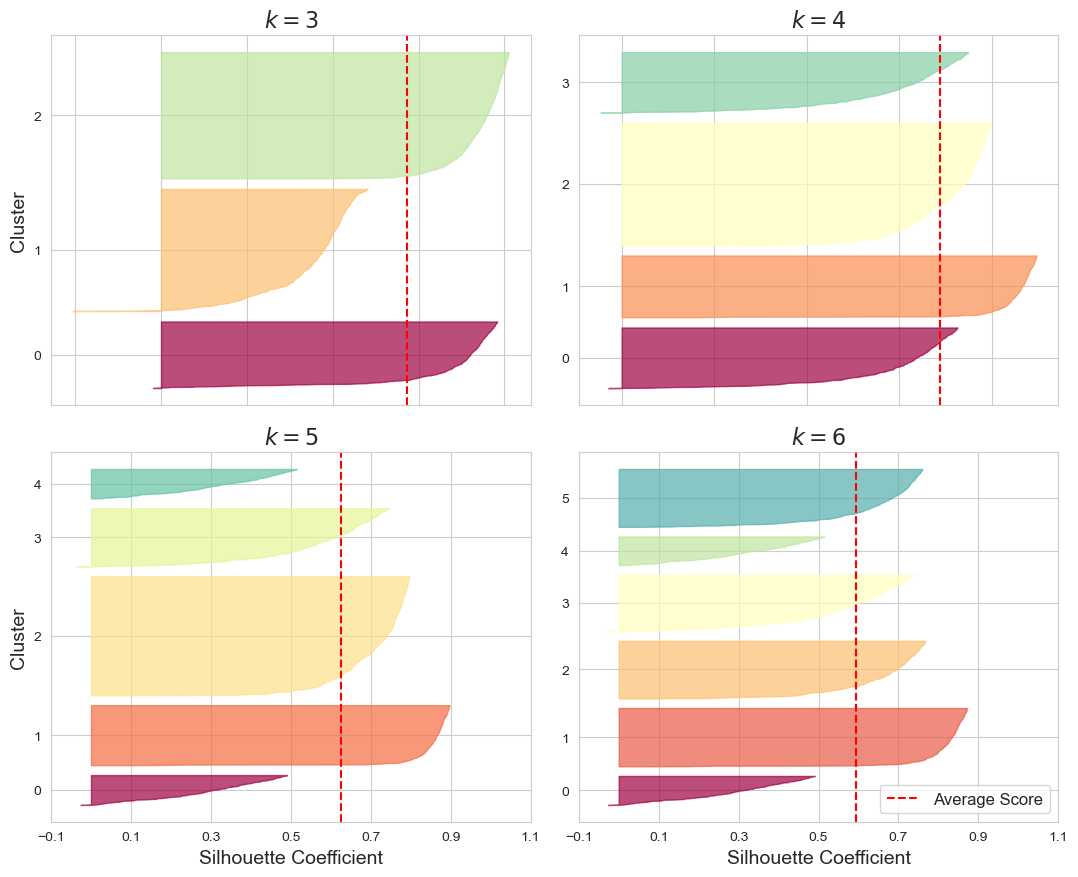

In [10]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter


plt.figure(figsize=(11, 9)) 

# Iterate through the specified number of clusters
for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    # Get predictions and silhouette coefficients
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    # Set y-ticks for clusters
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    # Y-axis label for specific subplots
    if k in (3, 5):
        plt.ylabel("Cluster", fontsize=14)
    
    # X-axis labeling and ticks
    if k in (5, 6):
        plt.gca().set_xticks(np.arange(-0.1, 1.1, 0.2))
        plt.xlabel("Silhouette Coefficient", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)

    # Vertical line for average silhouette score
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--", label="Average Score")
    
    # Title with adjusted fontsize
    plt.title(f"$k={k}$", fontsize=16)

plt.tight_layout()
plt.legend(loc='best', fontsize=12)
plt.show()


Here, $k=5$ looks like the best option, as all clústeres are roughly the same size, and they all cross the dashed line, which represents the mean puntuación de silueta.

## Featurización con K-means para clasificación

Los algoritmos de agrupamiento analizan la **distribución espacial** de los datos. Por lo tanto, la featurización con K-means crea un **índice espacial comprimido** de los datos que puede alimentarse al modelo en la siguiente etapa. Esto es un ejemplo de *stacking de modelos*.

Al usar K-means como procedimiento de featurización, un punto de datos puede representarse por su **pertenencia al clúster** (una codificación *one-hot* dispersa de la variable categórica de pertenencia).

Si también se dispone de una variable objetivo, podemos darle esa información como pista al procedimiento de agrupamiento. Una forma de incorporar la información del objetivo es incluirlo como una característica adicional de entrada al algoritmo K-means. Como el objetivo es minimizar la suma total de las **distancias euclidianas** en todas las dimensiones de entrada, el agrupamiento intentará equilibrar la similitud en el valor del objetivo y en el espacio de características original.

Diferencias más grandes en el objetivo producirán clústeres que prestan más atención a la frontera de clasificación, de modo que los valores del objetivo pueden escalarse para dar más o menos peso en el algoritmo de agrupamiento.

Para ilustrar la diferencia entre usar o no la información del objetivo al agrupar, vamos a aplicar el featurizador a un conjunto de datos sintético generado con la función `make_moons` de `Scikit-Learn` y representar el diagrama de Voronoi de las fronteras de los clústeres.


In [11]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.datasets import make_moons
from sklearn.preprocessing import OneHotEncoder

class KMeansFeaturizer:
    """Transforms numeric data into k-means cluster memberships.
    
    This transformer runs k-means on the input data and converts each data point
    into the id of the closest cluster. If a target variable is present, it is 
    scaled and included as input to k-means in order to derive clusters that
    obey the classification boundary as well as group similar points together.

    Parameters
    ----------
    k: integer, optional, default 100
        The number of clusters to group data into.

    target_scale: float, [0, infty], optional, default 5.0
        The scaling factor for the target variable. Set this to zero to ignore
        the target. For classification problems, larger `target_scale` values 
        will produce clusters that better respect the class boundary.

    random_state : integer or numpy.RandomState, optional
        This is passed to k-means as the generator used to initialize the 
        kmeans centers. If an integer is given, it fixes the seed. Defaults to 
        the global numpy random number generator.

    Attributes
    ----------
    cluster_centers_ : array, [k, n_features]
        Coordinates of cluster centers. n_features does count the target column.
    """

    def __init__(self, k=100, target_scale=5.0, random_state=None):
        self.k = k
        self.target_scale = target_scale
        self.random_state = random_state
        self.cluster_encoder = OneHotEncoder().fit(np.array(range(k)).reshape(-1,1))
        
    def fit(self, X, y=None):
        """Runs k-means on the input data and find centroids.

        If no target is given (`y` is None) then run vanilla k-means on input
        `X`. 

        If target `y` is given, then include the target (weighted by 
        `target_scale`) as an extra dimension for k-means clustering. In this 
        case, run k-means twice, first with the target, then an extra iteration
        without.

        After fitting, the attribute `cluster_centers_` are set to the k-means
        centroids in the input space represented by `X`.

        Parameters
        ----------
        X : array-like or sparse matrix, shape=(n_data_points, n_features)

        y : vector of length n_data_points, optional, default None
            If provided, will be weighted with `target_scale` and included in 
            k-means clustering as hint.
        """
        if y is None:
            # No target variable, just do plain k-means
            km_model = KMeans(n_clusters=self.k, 
                              n_init=20, 
                              random_state=self.random_state)
            km_model.fit(X)

            self.km_model_ = km_model
            self.cluster_centers_ = km_model.cluster_centers_
            return self

        # There is target information. Apply appropriate scaling and include
        # into input data to k-means            
        data_with_target = np.hstack((X, y[:,np.newaxis]*self.target_scale))

        # Build a pre-training k-means model on data and target
        km_model_pretrain = KMeans(n_clusters=self.k, 
                                   n_init=20, 
                                   random_state=self.random_state)
        km_model_pretrain.fit(data_with_target)

        # Run k-means a second time to get the clusters in the original space
        # without target info. Initialize using centroids found in pre-training.
        # Go through a single iteration of cluster assignment and centroid 
        # recomputation.
        km_model = KMeans(n_clusters=self.k, 
                          init=km_model_pretrain.cluster_centers_[:,:2], 
                          n_init=1, 
                          max_iter=1)
        km_model.fit(X)
        
        self.km_model = km_model
        self.cluster_centers_ = km_model.cluster_centers_
        return self
        
    def transform(self, X, y=None):
        """Outputs the closest cluster id for each input data point.

        Parameters
        ----------
        X : array-like or sparse matrix, shape=(n_data_points, n_features)

        y : vector of length n_data_points, optional, default None
            Target vector is ignored even if provided.

        Returns
        -------
        cluster_ids : array, shape[n_data_points,1]
        """
        clusters = self.km_model.predict(X)
        return self.cluster_encoder.transform(clusters.reshape(-1,1))
    
    def fit_transform(self, X, y=None):
        """Runs fit followed by transform.
        """
        self.fit(X, y)
        return self.transform(X, y)


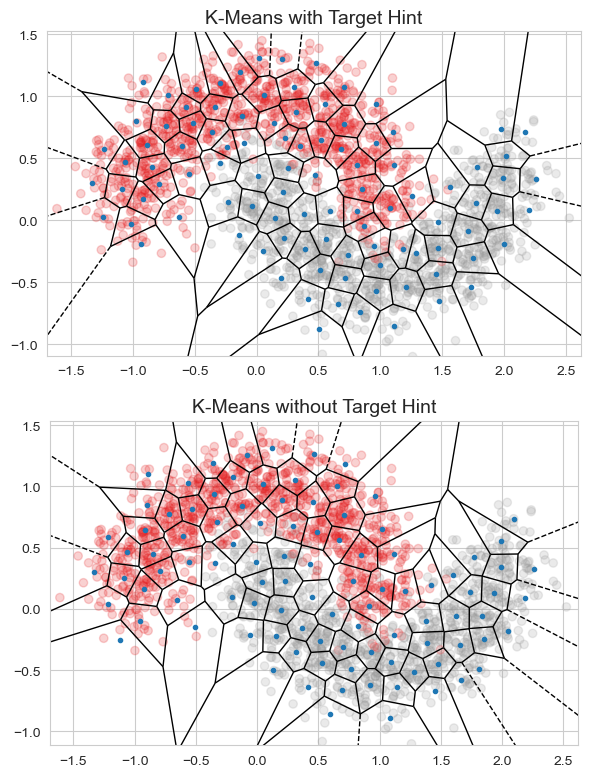

In [12]:
seed = 1
training_data, training_labels = make_moons(n_samples=2000, noise=0.2, random_state=seed)
kmf_hint = KMeansFeaturizer(k=100, target_scale=10, random_state=seed).fit(training_data, training_labels)
kmf_no_hint = KMeansFeaturizer(k=100, target_scale=0, random_state=seed).fit(training_data, training_labels)
def kmeans_voronoi_plot(X, y, cluster_centers, ax):
    """Plots the Voronoi diagram of the kmeans clusters overlayed with the data"""
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', alpha=0.2)
    vor = Voronoi(cluster_centers)
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, alpha=0.5)
    
fig = plt.figure(figsize=(8, 8))  # Increase the figure size for better separation
ax = plt.subplot(211, aspect='equal')
kmeans_voronoi_plot(training_data, training_labels, kmf_hint.cluster_centers_, ax)
ax.set_title('K-Means with Target Hint')

ax2 = plt.subplot(212, aspect='equal')
kmeans_voronoi_plot(training_data, training_labels, kmf_no_hint.cluster_centers_, ax2)
ax2.set_title('K-Means without Target Hint')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


El panel inferior muestra los clústeres entrenados **sin información del objetivo**. Se observa que varios clústeres abarcan el espacio vacío entre las dos clases.

El panel superior muestra que, cuando el algoritmo de agrupamiento recibe la **información del objetivo**, las fronteras de los clústeres se alinean mucho mejor con las fronteras de clase.


### Clasificación con  agrupamiento de características K-means


In [13]:
import sklearn
import scipy

test_data, test_labels = make_moons(n_samples=2000, noise=0.3, random_state=seed+5)

In [14]:
training_cluster_features = kmf_hint.transform(training_data)
test_cluster_features = kmf_hint.transform(test_data)

training_with_cluster = scipy.sparse.hstack((training_data, training_cluster_features))
test_with_cluster = scipy.sparse.hstack((test_data, test_cluster_features))

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [16]:
lr_cluster = LogisticRegression(random_state=seed).fit(training_with_cluster, training_labels)

classifier_names = ['LR',
                    'Random Forest']
classifiers = [LogisticRegression(random_state=seed),
               RandomForestClassifier(max_depth=5, n_estimators=10, 
                                      max_features=1, random_state=seed)]
for model in classifiers:
    model.fit(training_data, training_labels)

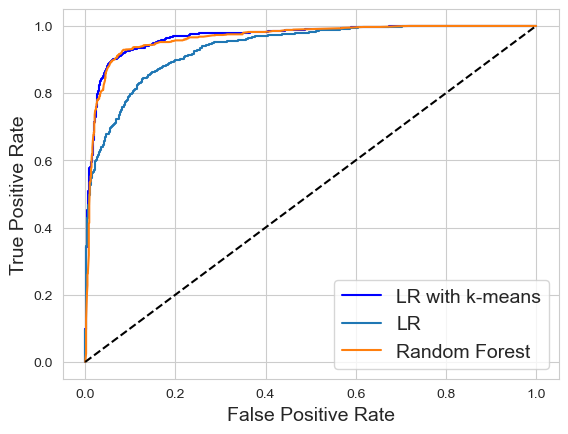

In [17]:
def test_roc(model, data, labels):
    if hasattr(model, "decision_function"):
        predictions = model.decision_function(data)
    else:
        predictions = model.predict_proba(data)[:,1]
    fpr, tpr, _ = sklearn.metrics.roc_curve(labels, predictions)
    return fpr, tpr

plt.figure()
fpr_cluster, tpr_cluster = test_roc(lr_cluster, test_with_cluster, test_labels)
plt.plot(fpr_cluster, tpr_cluster, 'b-', label='LR with k-means')

for i, model in enumerate(classifiers):
    fpr, tpr = test_roc(model, test_data, test_labels)
    plt.plot(fpr, tpr, label=classifier_names[i])
    
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.show()

Nuestro gráfico muestra que la **regresión logística** funciona mucho mejor con características de clúster que sin ellas. De hecho, con estas características, el clasificador lineal se desempeña tan bien como los clasificadores no lineales.

Una pequeña advertencia es que, en este ejemplo sintético, no ajustamos los **hiperparámetros** de ninguno de los modelos.

Sin embargo, este es un resultado interesante porque los clasificadores lineales son mucho más baratos de entrenar que los no lineales. Un menor costo computacional permite probar más modelos con diferentes características en el mismo tiempo, lo que aumenta la probabilidad de obtener un modelo mucho mejor.

| Modelo                                        | Tiempo             | Espacio       |
| --------------------------------------------- | ------------------ | ------------- |
| K-means entrenamiento                         | $O(nkda^2)$        | $O(kda)$      |
| K-means predicción                            | $O(kd)$            | $O(kd)$       |
| RL + características de clúster entrenamiento | $O(d^2+k)$         | $O(d+k)$      |
| RL + características de clúster predicción    | $O(d+k)$           | $O(d+k)$      |
| RBF SVM entrenamiento                         | $O(n^2d)$          | $O(n^2)$      |
| RBF SVM predicción                            | $O(sd)$            | $O(s)$        |
| GBT entrenamiento                             | $O(nd^2m)$         | $O(nd + 2^m)$ |
| GBT predicción                                | $O(2^m)$           | $O(2^m)$      |
| KNN entrenamiento                             | $O(1)$             | $O(nd)$       |
| KNN predicción                                | $O(nd + k \log n)$ | $O(nd)$       |

Donde:

* $n$ = número de muestras
* $d$ = número de características
* $k$ = número de clústeres (para K-means)
* $a$ = número de iteraciones (para K-means)
* $s$ = número de vectores de soporte (para SVM)
* $m$ = número de árboles (para GBT)

K-means + RL es la única combinación que es lineal (respecto al tamaño de los datos de entrenamiento, $O(nd)$, y el tamaño del modelo, $O(kd)$) tanto en entrenamiento como en predicción.


## Uso del agrupamiento para aprendizaje no supervisado

Aunque la mayoría de las aplicaciones de Machine Learning hoy se basan en aprendizaje supervisado, la gran mayoría de los datos disponibles en realidad no están etiquetados: tenemos las características de entrada $X$, pero no las etiquetas $y$.

El **aprendizaje no supervisado** aprovecha los datos sin etiquetar sin necesidad de que los humanos etiqueten cada punto.

### Un caso de estudio: segmentación de imágenes

La **segmentación de imágenes** consiste en dividir una imagen en múltiples segmentos.

* En la **segmentación semántica**, todos los píxeles que son parte del mismo tipo de objeto se asignan al mismo segmento.
* En la **segmentación de instancias**, todos los píxeles que son parte de un objeto individual se asignan a su propio segmento.

Aquí haremos algo mucho más simple: **segmentación por color**. Simplemente asignaremos píxeles al mismo segmento si tienen un color similar.


In [18]:
# Fetch the MedMNIST dataset
import medmnist
import os

# Choose a specific MedMNIST dataset (e.g., 'pathmnist')
data_flag = 'bloodmnist'
download = False

# Ensure the target folder exists
os.makedirs('./datasets/ch4', exist_ok=True)

# Load the chosen MedMNIST dataset
info = medmnist.INFO[data_flag]
dataset_class = getattr(medmnist, info['python_class'])
train_dataset = dataset_class(split='train', download=download, root='./datasets/ch4')
image = train_dataset.imgs[0]

La imagen se representa como un **arreglo 3D**:

* la primera dimensión corresponde a la **altura**,
* la segunda a la **anchura**,
* y la tercera al número de **canales de color**, en este caso rojo, verde y azul (RGB).


In [19]:
image.shape

(28, 28, 3)

El siguiente código realiza lo siguiente:

1. Reorganiza el arreglo para obtener una lista larga de colores RGB.
2. Luego agrupa estos colores usando K-means.
3. Después, para cada color (p. ej., morado), busca el color medio del clúster al que pertenece el píxel.
4. Finalmente, vuelve a dar forma a esta lista larga de colores para obtener la misma forma que la imagen original.


In [20]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

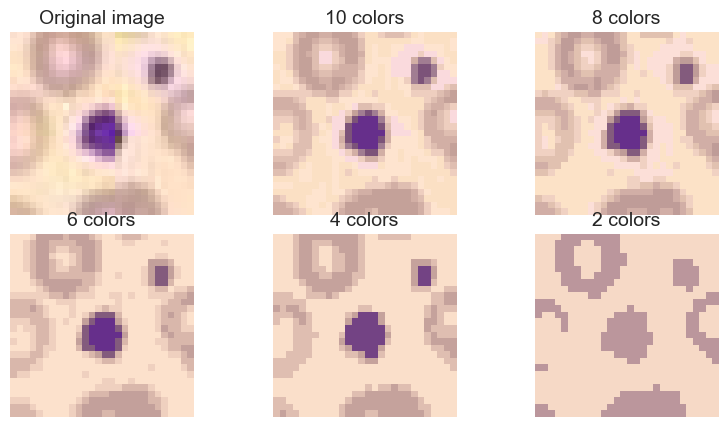

In [21]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

Cuando se usan menos de 4 clústeres, el color morado del granulocito no logra obtener un clúster propio.

Esto se debe a que el granulocito es un poco más pequeño que el resto de la imagen, por lo que, aunque su color es llamativo, K-means no le asigna un clúster específico:

> K-means prefiere clústeres de tamaños similares.
